In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

path = "./res/UCI HAR Dataset/features.txt"

features_df = pd.read_csv(path,sep="\s+",
                         header=None, names=["column_index", "column_name"])

feature_names = features_df["column_name"].values.tolist()

path = "./res/UCI HAR Dataset/"

X_train = pd.read_csv(path+"train/X_train.txt",sep="\s+", names=feature_names)
X_test = pd.read_csv(path+"test/X_test.txt",sep="\s+", names=feature_names)


y_train = pd.read_csv(path+"train/y_train.txt", sep="\s+", header=None,
                     names=["action"])

y_test = pd.read_csv(path+"test/y_test.txt", sep="\s+", header=None,
                     names=["action"])



rf = RandomForestClassifier(random_state=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("rf acc : {}".format(accuracy_score(y_test, y_pred)))

D:\program files\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
D:\program files\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
D:\program files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\program files\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


rf acc : 0.9015948422124194


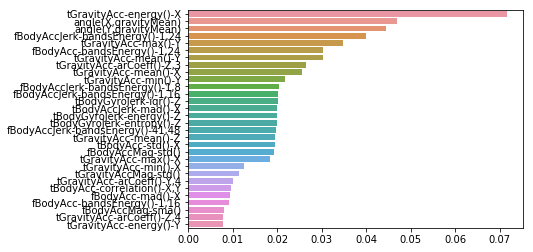

In [6]:
ftr_importance_val = rf.feature_importances_
ftr_importances = pd.Series(ftr_importance_val, index=X_train.columns)
ftr_top30 = ftr_importances.sort_values(ascending=False)[:30]

sns.barplot(x=ftr_top30, y=ftr_top30.index)

In [31]:
from sklearn.model_selection import GridSearchCV

param = {
    "min_samples_leaf": [4, 12, 18],
    "min_samples_split": [6, 12],
    "max_depth" :[10, None]
}

rf = RandomForestClassifier(random_state=100, n_jobs=1)
gs = GridSearchCV(rf, param_grid=param, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)


res_df = pd.DataFrame.from_dict(gs.cv_results_)
res_df[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split' ,'mean_test_score']]

D:\program files\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\program files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_score
0,10,4,6,0.900163
1,10,4,12,0.891186
2,10,12,6,0.907508
3,10,12,12,0.907508
4,10,18,6,0.910092
5,10,18,12,0.910092
6,None,4,6,0.909956
7,None,4,12,0.891186
8,None,12,6,0.904244
9,None,12,12,0.904244


In [42]:
param = {
    "min_samples_leaf": [18, 25, 30],
    "max_depth" :[10, 15],
    "n_estimators" :[50, 100, 200]
}

rf = RandomForestClassifier(random_state=100, n_jobs=1)
gs = GridSearchCV(rf, param_grid=param, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)


res_df = pd.DataFrame.from_dict(gs.cv_results_)
res_df[['param_min_samples_leaf','param_max_depth', 'param_n_estimators' ,'mean_test_score']]

D:\program files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: 

,param_min_samples_leaf,param_max_depth,param_n_estimators,mean_test_score
0,18,10,50,0.914445
1,18,10,100,0.917029
2,18,10,200,0.916893
3,25,10,50,0.915397
4,25,10,100,0.917982
5,25,10,200,0.916621
6,30,10,50,0.913221
7,30,10,100,0.915533
8,30,10,200,0.914989
9,18,15,50,0.913357


In [43]:
param = {
    "min_samples_leaf": [21, 24, 27],
    "max_depth" :[4, 6, 8],
    "n_estimators" :[80, 100, 120]
}

rf = RandomForestClassifier(random_state=100, n_jobs=1)
gs = GridSearchCV(rf, param_grid=param, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)


res_df = pd.DataFrame.from_dict(gs.cv_results_)
res_df[['param_min_samples_leaf','param_max_depth', 'param_n_estimators' ,'mean_test_score']]

D:\program files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: 

,param_min_samples_leaf,param_max_depth,param_n_estimators,mean_test_score
0,21,4,80,0.900571
1,21,4,100,0.900163
2,21,4,120,0.896899
3,24,4,80,0.900435
4,24,4,100,0.900435
5,24,4,120,0.896763
6,27,4,80,0.900027
7,27,4,100,0.899619
8,27,4,120,0.896627
9,21,6,80,0.908460


In [46]:
param = {
    "min_samples_leaf": [25, 27],
    "max_depth" :[9, 10, 11],
    "n_estimators" :[100],
    "max_features": [200, "auto"]
}

rf = RandomForestClassifier(random_state=100, n_jobs=1)
gs = GridSearchCV(rf, param_grid=param, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)



D:\program files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\program files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: 

KeyError: "['param_max_feature'] not in index"

In [47]:
res_df = pd.DataFrame.from_dict(gs.cv_results_)
res_df[['param_min_samples_leaf','param_max_depth', 'param_max_features' ,'mean_test_score']]

,param_min_samples_leaf,param_max_depth,param_max_features,mean_test_score
0,25,9,200,0.898395
1,27,9,200,0.895811
2,25,9,auto,0.914581
3,27,9,auto,0.914853
4,25,10,200,0.895947
5,27,10,200,0.894587
6,25,10,auto,0.917982
7,27,10,auto,0.915261
8,25,11,200,0.896627
9,27,11,200,0.893770
